In [78]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [79]:
def LeastSquares(x_arr, y_arr): # returns [k, b, sigma_k, sigma b]
    v = x_arr
    u = y_arr

    N = len(v)

    mu = np.mean(u) # средее
    mv = np.mean(v)
    mv2 = np.mean([v_i**2 for v_i in v]) # средний квадрат
    mu2 = np.mean([u_i**2 for u_i in u])
    muv = np.mean ([u[i] * v[i] for i in range(len(u))]) # среднее от произведения
    k = (muv - mu * mv) / (mv2 - mv**2)
    b = mu - k * mv

    sigma_k = np.sqrt(1/(N-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    sigma_b = sigma_k * np.sqrt(mv2)

    return (k, b, sigma_k, sigma_b)

получили дифракцию, запишем расстояние микроскопа

In [80]:
l_micro = 42 * .01 # sm

In [81]:
l_odna_polosa = 43.5 * .01
l_dve_polosa = 44 * .01
l_tri_polosa = 44.4 * .01
l_chetyre_polosa = 44.5 * .01
l_pyat_polosa = 44.6 * .01


Fraungofer

In [82]:
b1 = 0 # photo

In [83]:
b = b1

In [84]:
f2 = 15.5 * .01 # m

25 * 0.04 mm

In [85]:
c = 0.04

In [86]:
b = [-10, -20, -25]
b = [10, 20, 25]

/tmp/ipykernel_109890/1300045195.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


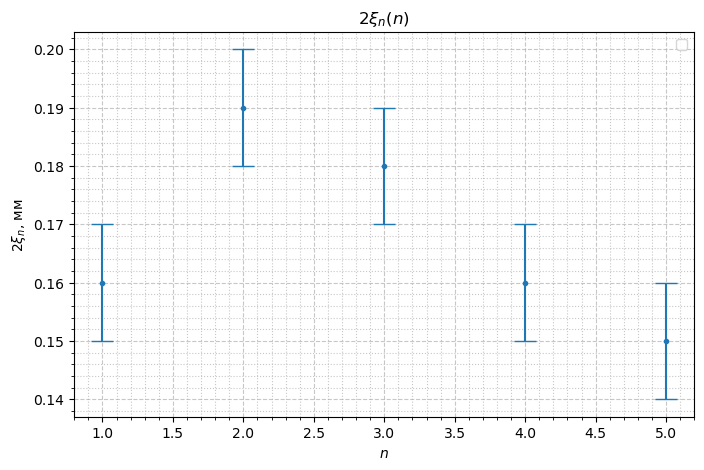

In [87]:

m_values = np.array([1, 2, 3, 4, 5])
z_m = np.array([0.16, .19, .18, .16, .15])
sigma_z = np.array([0.01] * 5)

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(m_values, z_m, yerr=sigma_z, fmt='.', capsize=8)

# Labels and title
plt.xlabel(r'$n$')
plt.ylabel(r'$ 2 \xi_n $, мм')
plt.title(r"$ 2 \xi_n (n)$")

# Grid and legend
plt.minorticks_on()
plt.grid(True, linestyle='--', alpha=0.7, which='major')
plt.grid(True, linestyle=':', alpha=0.7, which='minor')
plt.legend()
plt.show()

0.004045454545454546 2.764892059228735e-05


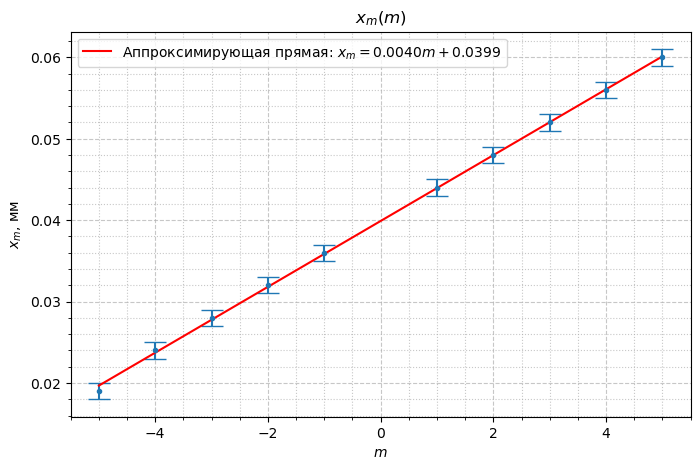

In [92]:
m_values = np.array([-5, -4, -3, -2, -1, 1, 2, 3, 4, 5])
z_m = np.array([.019, .024, .028, .032, .036, .044, .048, .052, .056, .060])
sigma_z = np.array([.001] * 1)

# Plotting
plt.figure(figsize=(8, 5))
plt.errorbar(m_values, z_m, yerr=sigma_z, fmt='.', capsize=8, label=r'')

# Linear fit (least squares approximation)
coeffs = np.polyfit(m_values, z_m, 1)  # Fit a straight line (degree = 1)
coeffs = LeastSquares(m_values, z_m)
linear_fit = np.poly1d(coeffs[:2])  # Create a polynomial function

# Generate smooth values for the fitted line
m_fit = np.linspace(min(m_values), max(m_values), 100)
z_fit = linear_fit(m_fit)
plt.plot(m_fit, z_fit, 'r', label=f'Аппроксимирующая прямая: $x_m = {coeffs[0]:.4f} m + {coeffs[1]:.4f}$')

# Labels and title
plt.xlabel(r'$m$')
plt.ylabel(r'$x_m$, мм')
plt.title("$x_m(m)$")

print(coeffs[0], coeffs[2])

# Grid and legend
plt.minorticks_on()
plt.grid(True, linestyle='--', alpha=0.7, which='major')
plt.grid(True, linestyle=':', alpha=0.7, which='minor')
plt.axis('on')
plt.legend()
plt.show()